# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
last_3_ele = a[-3:]
print(last_3_ele)

# reverse the list
rev = []
for ele in reversed(a):
    rev.append(ele)
print(rev)

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
sq_list = []
for ele in a:
    sq_list.append(ele**2)
print(sq_list)

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [8]:
# create a numpy array from this list
b = np.array(a, dtype=np.float32) # change this

In [10]:
# find the mean of b
np.mean(b)

3.5

In [12]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
sq_np_list = b**2
sq_np_list

array([ 1.,  4.,  9., 16., 25., 36.], dtype=float32)

In [16]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
b

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
# find the mean value of each row
np.mean(b, axis = 1)

array([2., 5.], dtype=float32)

In [18]:
# find the mean value of each column
np.mean(b, axis = 0)

array([2.5, 3.5, 4.5], dtype=float32)

In [22]:
# find the third column of b
b[:, 2]

array([3., 6.], dtype=float32)

In [53]:
# load in the "starbucks_clean.csv" dataset
df = pd.read_csv('../data/starbucks_clean.csv')
df.head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,coffee,brewedcoffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175
1,coffee,brewedcoffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260
2,coffee,brewedcoffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330
3,coffee,brewedcoffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410
4,classicespressodrinks,cafflatte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75


In [54]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

198.34913793103448

In [55]:
# how many different categories of beverages are there?
df['beverage_category'].unique()

array(['coffee', 'classicespressodrinks', 'signatureespressodrinks',
       'tazoteadrinks', 'shakenicedbeverages', 'smoothies',
       'frappuccinoblendedcoffee', 'frappuccinolightblendedcoffee',
       'frappuccinoblendedcrme'], dtype=object)

In [56]:
# what is the average # calories for each beverage category?
df.groupby('beverage_category').mean()['calories']

beverage_category
classicespressodrinks            140.172414
coffee                             4.250000
frappuccinoblendedcoffee         276.944444
frappuccinoblendedcrme           233.076923
frappuccinolightblendedcoffee    162.500000
shakenicedbeverages              110.769231
signatureespressodrinks          250.000000
smoothies                        282.500000
tazoteadrinks                    192.083333
Name: calories, dtype: float64

In [57]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage_prep').mean()['sugars'].max()

55.6875

In [58]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage').mean()['calcium']

beverage
bananachocolatesmoothie                   20.000000
brewedcoffee                               0.500000
caffamericano                              1.500000
cafflatte                                 35.000000
caffmochawithoutwhippedcream              30.000000
cappuccino                                22.500000
caramel                                   11.000000
caramelapplespicewithoutwhippedcream       0.000000
caramelmacchiato                          28.333333
caramelwithoutwhippedcream                12.000000
coffee                                    12.333333
espresso                                   0.000000
hotchocolatewithoutwhippedcream           35.000000
icedbrewedcoffeewithclassicsyrup           0.000000
icedbrewedcoffeewithmilkclassicsyrup       8.000000
javachip                                  11.666667
javachipwithoutwhippedcream               12.555556
mocha                                     11.000000
mochawithoutwhippedcream                  12.000000
ora

In [60]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df['protein/calories'] = df['protein']/df['calories']
df[df['protein/calories'] == df['protein/calories'].max()]['beverage']

2    brewedcoffee
3    brewedcoffee
Name: beverage, dtype: object

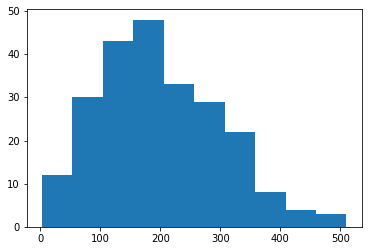

In [67]:
# plot the distribution of the number of calories in drinks using matplotlib
_ = plt.hist(df['calories'])

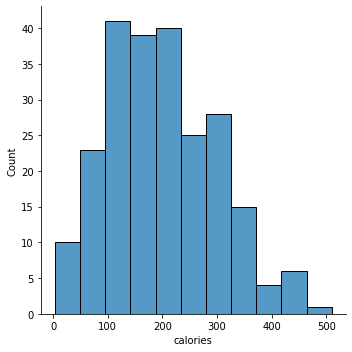

In [68]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.displot(x = "calories", data = df)

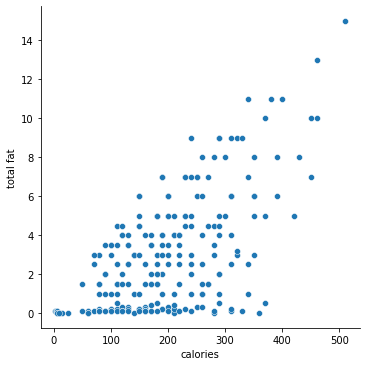

In [69]:
# plot calories against total fat using seaborn
sns.relplot(x = "calories", y = "total fat", data = df)

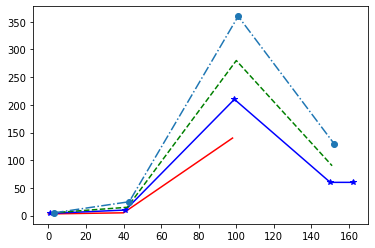

In [78]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
plt.plot(df[df['beverage_prep'] == 'Short']['calories'], '-r')
plt.plot(df[df['beverage_prep'] == 'Tall']['calories'], '-*b')
plt.plot(df[df['beverage_prep'] == 'Grande']['calories'], '--g')
plt.plot(df[df['beverage_prep'] == 'Venti']['calories'], '-.o')